# Lead Scoring - Case Study
## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of Case Study

There are quite a few goals for this case study.

1- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



### 1) Importing necessary modules 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing library for splitting dataset
from sklearn.model_selection import train_test_split
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler
# importing necessary library
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve
#importing library for splitting dataset
from sklearn.model_selection import train_test_split
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


### Reading the dataset 

In [2]:
df_leads = pd.read_csv("Leads.csv")

In [3]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2) Inspecting the dataframe 

In [4]:
#Let's check the dimesions of the dataframe
df_leads.shape


(9240, 37)

In [5]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Exploratory Data Analysis 

### 3) Data cleaning

As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [7]:
df_leads = df_leads.replace('select',np.nan)
df_leads = df_leads.replace('Select',np.nan)

In [8]:
# Dropping unique valued columns
df_leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [9]:
#Checking for count of missing values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### Dropping Columns with Missing Values >=35%

In [10]:
# Removing all the columns that are no required and have 35% null values
df_leads = df_leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [11]:
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [12]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. 



In [13]:
df_leads['Specialization'] = df_leads['Specialization'].fillna('not provided') 
df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].fillna('not provided')
df_leads['Country'] = df_leads['Country'].fillna('not provided')
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].fillna('not provided')
df_leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

### Performing imputations on the missing data 

In [14]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [15]:
df_leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0],inplace= True)

In [17]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [18]:
df_leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [19]:
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0],inplace= True)

In [20]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [21]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0],inplace= True)

In [22]:
df_leads['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [23]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [24]:
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mean(),inplace= True)

In [25]:
# Rechecking the percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)


Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [26]:
# To familiarize all the categorical values
for column in df_leads:
    print("Column: ",column)
    print("Value counts: ")
    print(df_leads[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')


Column:  Prospect ID
Value counts: 
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Column:  Lead Origin
Value counts: 
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Column:  Lead Source
Value counts: 
Google        

In [27]:
# Removing Id values since they are unique for everyone
df_final = df_leads.drop('Prospect ID',axis=1)
df_final.shape


(9240, 21)

###  Categorical Variables Analysis

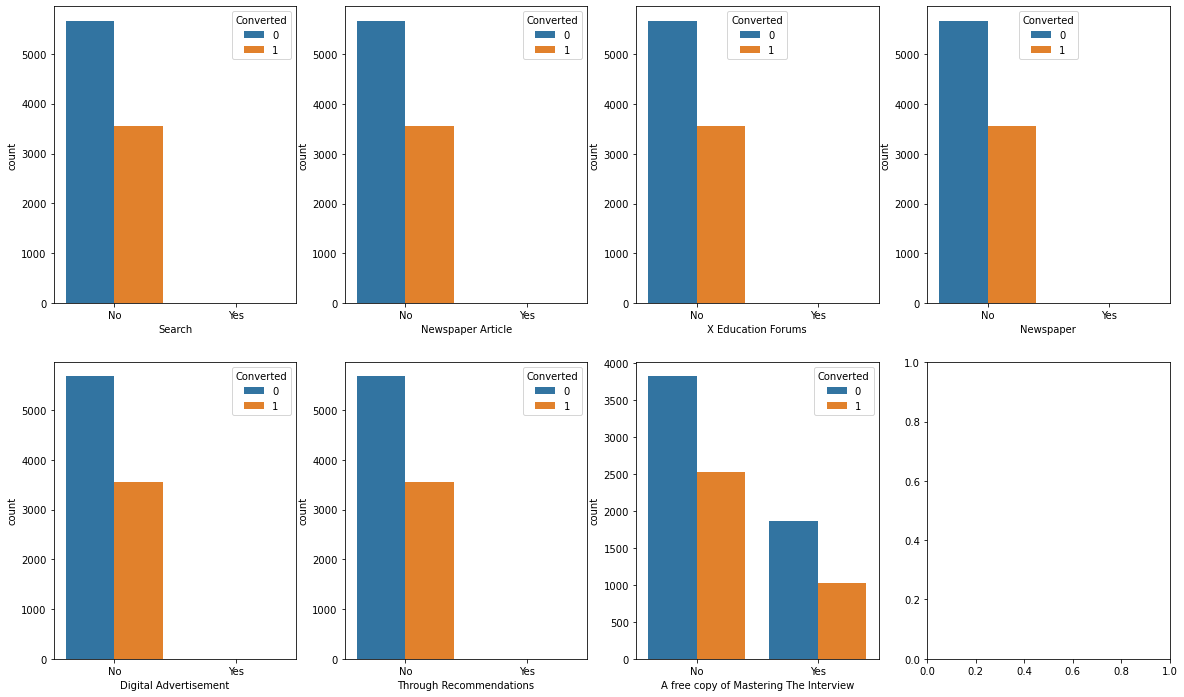

In [28]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(2,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = df_final, ax = axs[0,0])
# sns.countplot(x = "Magazine", hue = "Converted", data = df_final, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_final, ax = axs[0,1])
sns.countplot(x = "X Education Forums", hue = "Converted", data = df_final, ax = axs[0,2])
sns.countplot(x = "Newspaper", hue = "Converted", data = df_final, ax = axs[0,3])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df_final, ax = axs[1,0])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df_final, ax = axs[1,1])
# sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df_final, ax = axs[1,3])
# sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =df_final, ax = axs[2,0])
# sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df_final, ax = axs[2,1])
# sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df_final, ax = axs[2,2])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_final, ax = axs[1,2])
plt.show()

### Inference
- For all these columns except 'A free copy of Mastering The Interview','Lead Origin','' data is highly imbalanced, thus we will drop them
- "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.


In [29]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
cols_to_drop=['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']


In [31]:
cols_to_drop

['Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [32]:
df_final.drop(columns=cols_to_drop,axis=1, inplace=True)


### Column: Lead Source

In [33]:
#checking value counts of Lead Source column

df_final['Lead Source'].value_counts(ascending=False)#.plot.barh()


Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [34]:
#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df_final['Lead Source'] = df_final['Lead Source'].replace('google','Google')


In [35]:
#combining low frequency values to Others

df_final['Lead Source'] = df_final['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')


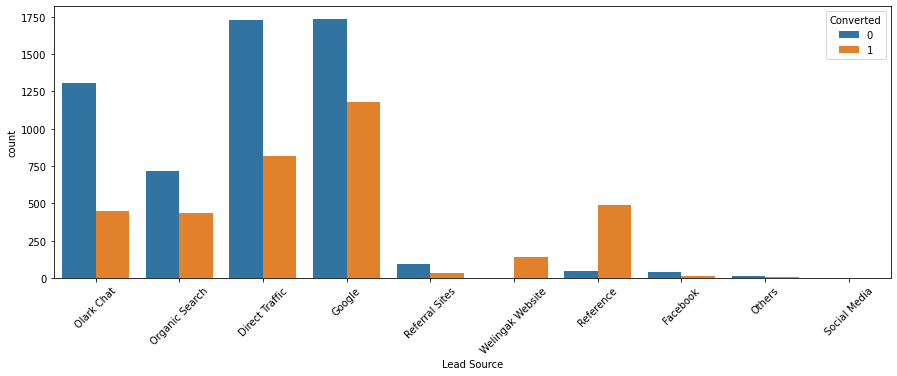

In [36]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


### Inference

- Maximum Leads are generated by Google and Direct Traffic.

- Conversion rate of Reference leads and Welinkgak Website leads is very high.



### Column: Country

In [37]:
#checking value counts of Country column

df_final['Country'].value_counts(ascending=False)#.plot.barh()
# plt.show()


India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

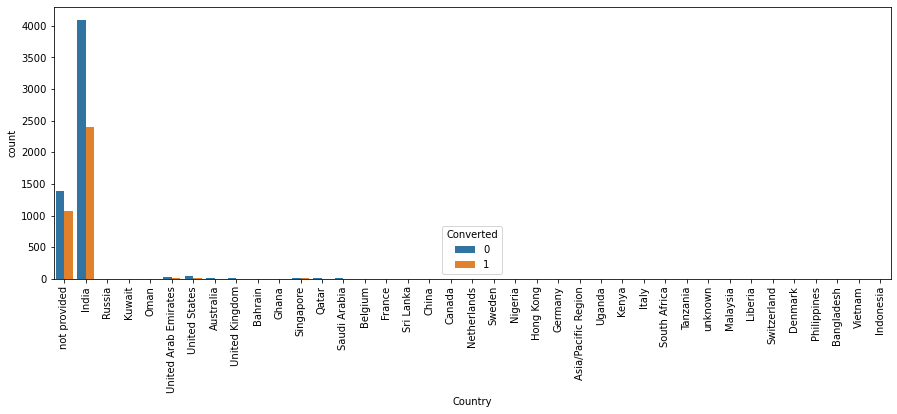

In [38]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


### Inference
As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column



In [39]:
df_final.drop(columns='Country',axis=1,inplace=True)

In [40]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

### Column: What is your current occupation 

In [41]:
df_final['What is your current occupation'].value_counts(ascending=False)#.plot.barh()
# plt.show()

Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

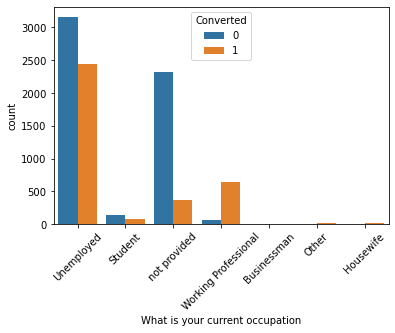

In [42]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


### Inference

- Maximum leads generated are unemployed and their conversion rate is more than 50%.
- Conversion rate of working professionals is very high.


### Column: What matters most to you in choosing a course



In [43]:
#checking value counts of 'What matters most to you in choosing a course'

df_final['What matters most to you in choosing a course'].value_counts(ascending=False)#.plot.barh()
# plt.show()

Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

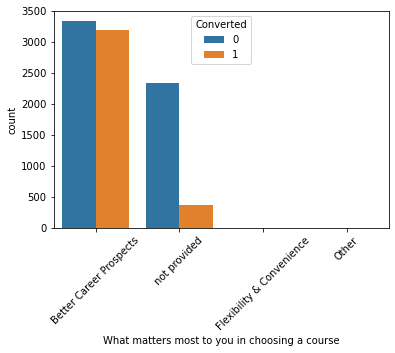

In [44]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


### Column: Last Activity 

In [45]:
#checking value counts of Last Activity
df_final['Last Activity'].value_counts(ascending=False)#.plot.barh()


Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
#combining low frequency values
df_final['Last Activity'] = df_final['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')


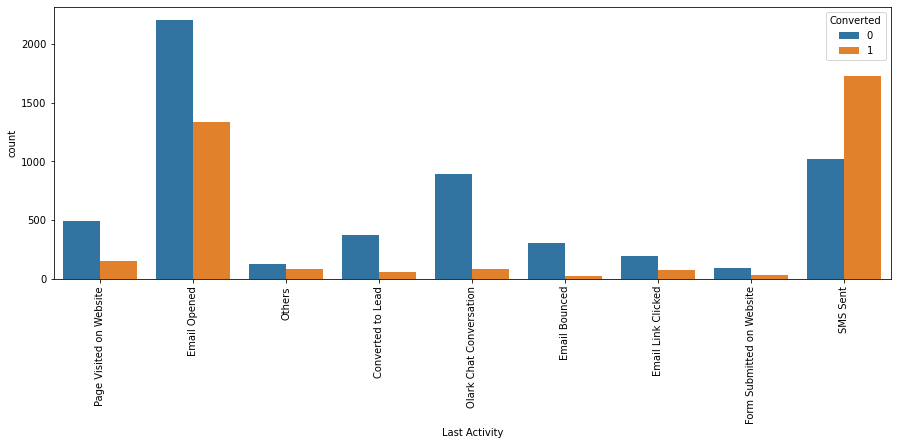

In [47]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


### Inference

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.


In [48]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
df_final.drop(columns='Last Activity',axis=1,inplace=True)

### Column: Lead Origin 

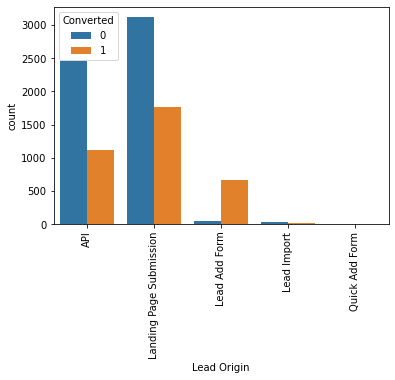

In [49]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = df_final )
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


### Columns: Do Not Email & Do Not Call

 

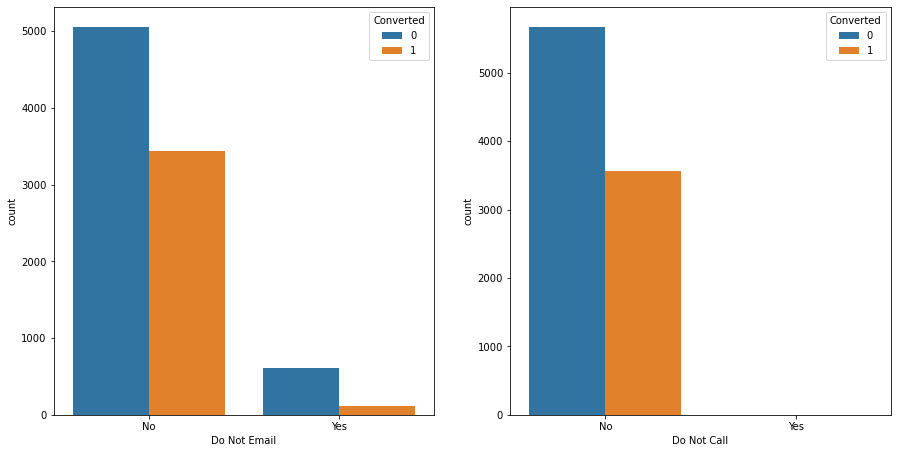

In [50]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_final, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_final, ax = axs[1])
plt.show()


### Inference
- We can append the Do Not Call Column to the list of Columns to be Dropped data is skewed

In [51]:
df_final.drop(columns=['Do Not Call'], axis=1, inplace=True)

### Column: Last Notable Activity 

In [52]:
#checking value counts of last Notable Activity
df_final['Last Notable Activity'].value_counts(ascending=False)


Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [53]:
#clubbing lower frequency values

df_final['Last Notable Activity'] = df_final['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')


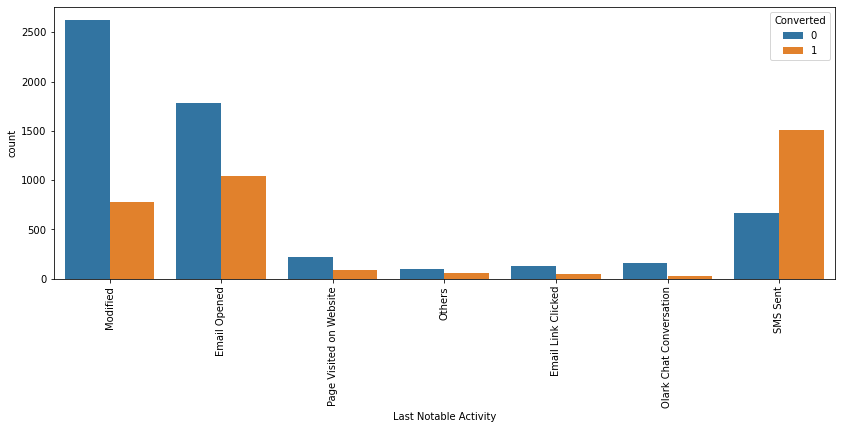

In [54]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_final )
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()


### Inference

- Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
- SMS sent as last acitivity has high conversion rate.


In [55]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
df_final.drop(columns='Last Notable Activity', axis=1, inplace=True)

In [56]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

### Column: Specialization 

In [57]:
df_final['Specialization'].value_counts()

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

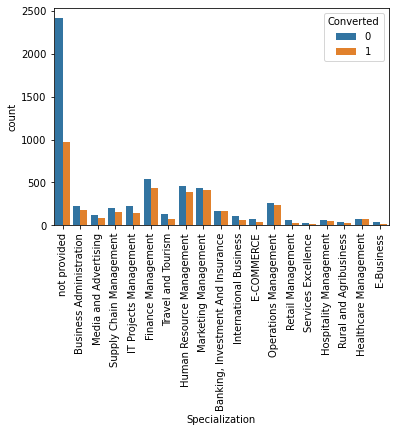

In [58]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='Specialization', hue='Converted' , data = df_final)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


###  Numerical Attributes Analysis


### Target column: Converted 

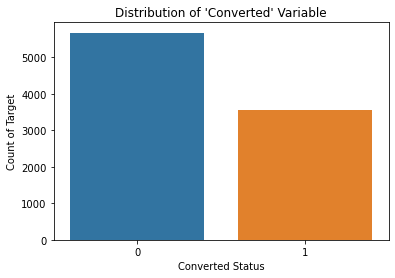

In [59]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(df_final.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()


In [60]:
# Finding out conversion rate
Converted = (sum(df_final['Converted'])/len(df_final['Converted'].index))*100
Converted


38.53896103896104

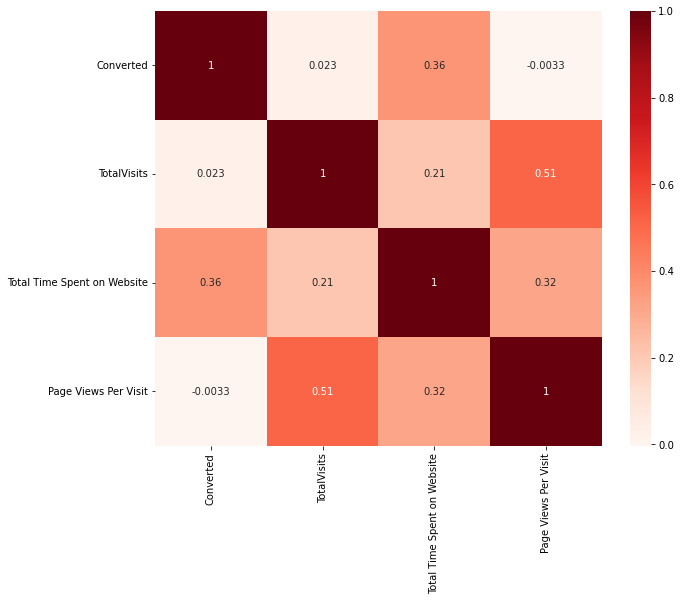

In [61]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df_final.corr(), cmap="Reds", annot=True)
plt.show()


### Total Visits

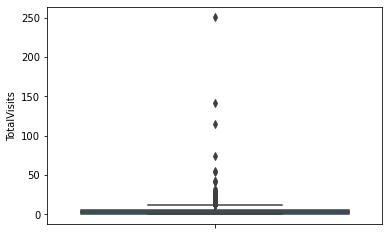

In [62]:
#visualizing spread of variable Total Visits

sns.boxplot(y=df_final['TotalVisits'])
plt.show()

In [63]:
#checking percentile values for "Total Visits"

df_final['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

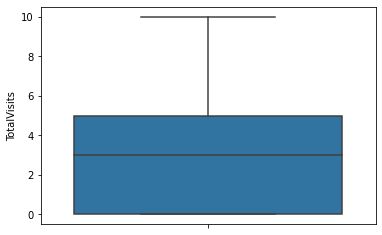

In [64]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = df_final['TotalVisits'].quantile([0.05,0.95]).values
df_final['TotalVisits'][df_final['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_final['TotalVisits'][df_final['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df_final['TotalVisits'])
plt.show()

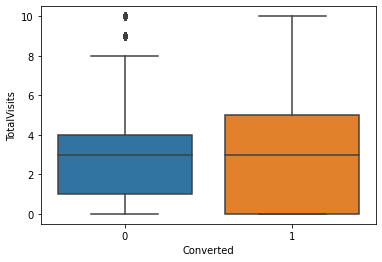

In [65]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_final)
plt.show()

### Inference
As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

### Total time spent on website

In [66]:
#checking percentiles for "Total Time Spent on Website"

df_final['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

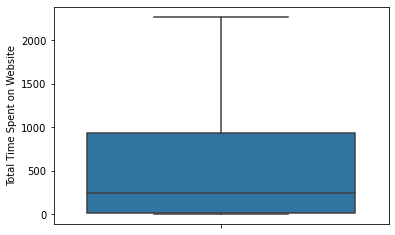

In [67]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = df_final['Total Time Spent on Website'])
plt.show()

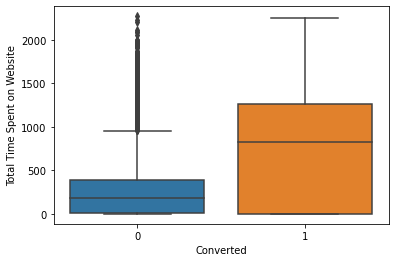

In [68]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_final)
plt.show()

### Inference
As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

### Page views per visit

In [69]:
df_final['Page Views Per Visit'].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

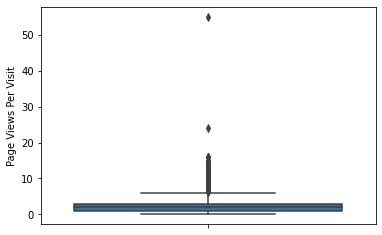

In [70]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =df_final['Page Views Per Visit'])
plt.show()

Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

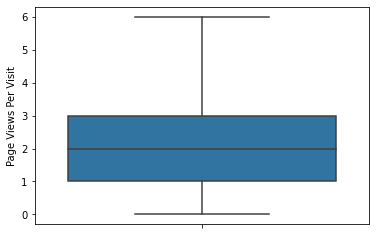

In [71]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df_final['Page Views Per Visit'].quantile([0.05,0.95]).values
df_final['Page Views Per Visit'][df_final['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_final['Page Views Per Visit'][df_final['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=df_final['Page Views Per Visit'])
plt.show()

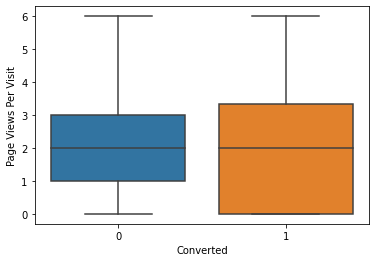

In [72]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_final)
plt.show()

### Inference

Median for converted and not converted leads is almost same.
Nothing conclusive can be said on the basis of Page Views Per Visit.

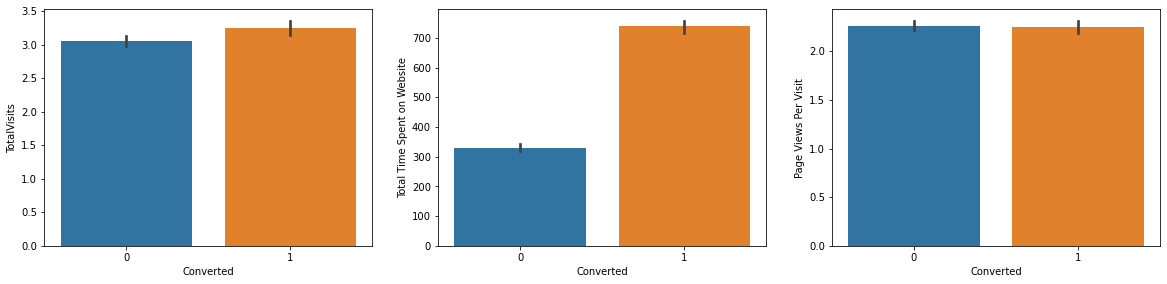

In [73]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted',  data = df_final)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = df_final)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = df_final)
plt.show()

### Inference
The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Now, all data labels are in good shape , we will proceed to our next step which is Data Preparation

## 4) Data Preparation
#### 4.1 Converting some binary variables (Yes/No) to 0/1

In [74]:
varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_final[varlist] = df_final[varlist].apply(binary_map)

In [75]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course
0,API,Olark Chat,0,0,0.0,0,0.0,not provided,Unemployed,Better Career Prospects
1,API,Organic Search,0,0,5.0,674,2.5,not provided,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,not provided,Unemployed,Better Career Prospects


In [76]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Specialization                                 9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

#### 4.2 Dummy Variable Creation:

In [77]:
#getting a list of categorical columns foy creating dummy

cat_cols= df_final.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

In [78]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df_final[['Lead Origin']], drop_first=True)
df_final = pd.concat([df_final,dummy],1)


In [79]:
dummy = pd.get_dummies(df_final['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df_final = pd.concat([df_final, dummy], axis = 1)

In [80]:
dummy = pd.get_dummies(df_final['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_not provided'], 1)
df_final = pd.concat([df_final, dummy], axis = 1)

In [81]:
#dropping the original columns after dummy variable creation

df_final.drop(cat_cols,1,inplace = True)

In [82]:
#checking dataset after dummy variable creation
df_final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 5) Test-Train Split

In [83]:
# Putting feature variable to X
X=df_final.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
# Putting response variable to y
y = df_final['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  6) Feature Scaling

In [86]:
#scaling of features
scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.0,0.4,0.214349,0.221667,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3516,0.0,0.5,0.046655,0.416667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.0,0.5,0.541373,0.833333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3934,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

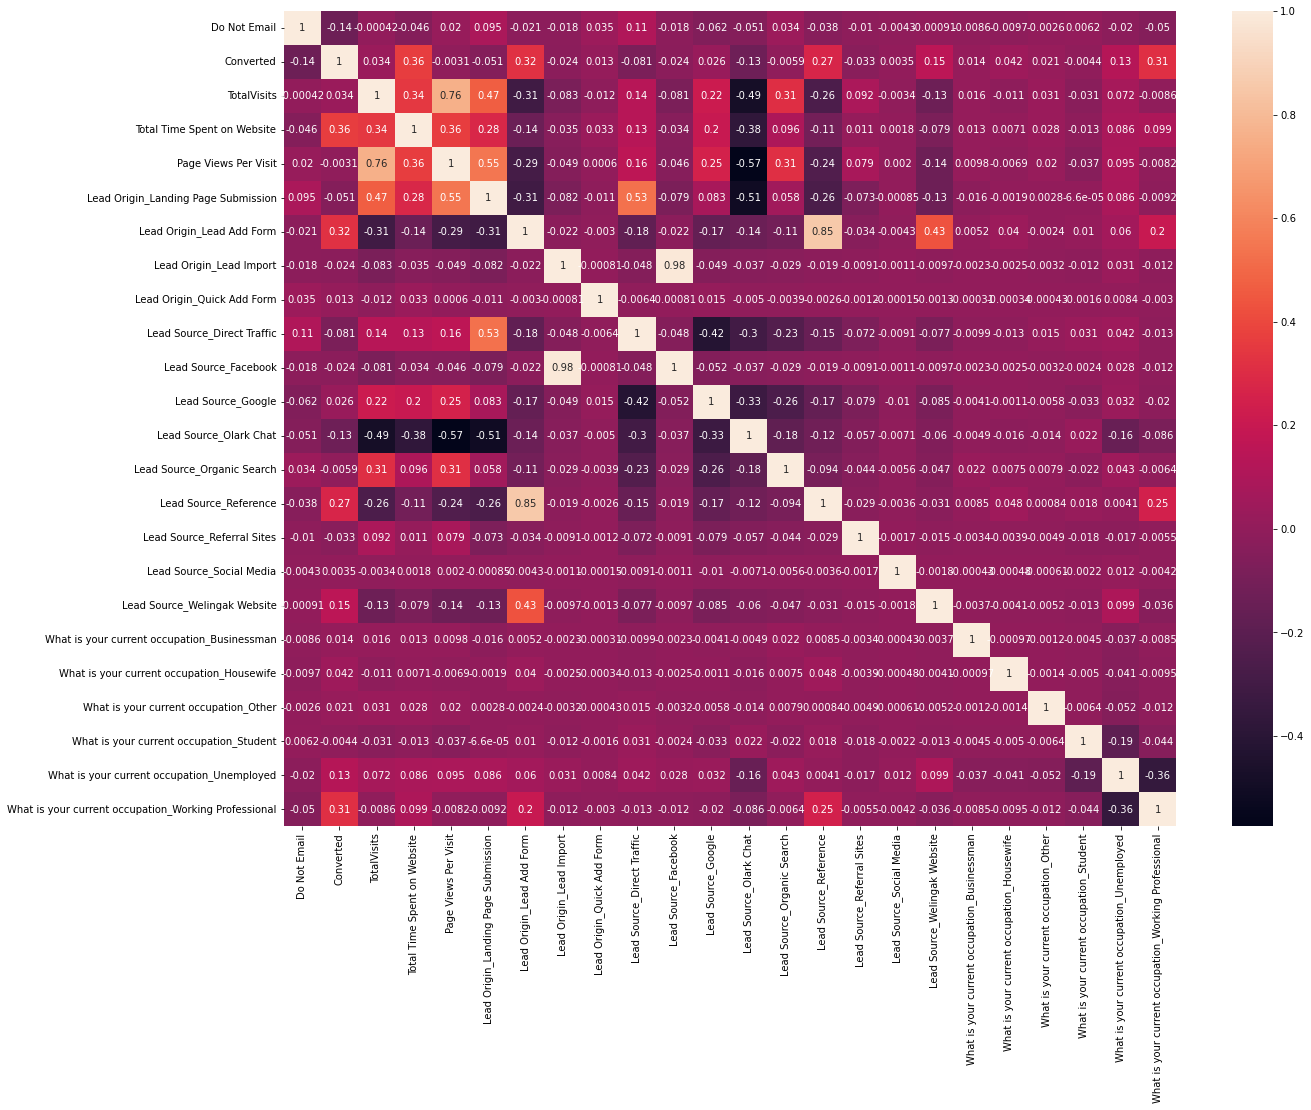

In [88]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(df_final.corr(),annot = True)
plt.show()

### 7) Model Building using Stats Model & RFE

In [89]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([ True,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 2),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Profe

In [92]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [93]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Social Media', 'What is your current occupation_Other'],
      dtype='object')

#### Model 1

In [94]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2868.1
Date:                Sun, 26 Feb 2023   Deviance:                       5736.2
Time:                        20:07:00   Pearson chi2:                 7.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3576
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0203      0.126    -23.932      0.000      -3.268      -2.773
Do Not Email                                            -1.2744      0.161     -7.926      0.000      -1.589      -0.959
TotalVisits                                              1.0943      0.179      6.103      0.000       0.743       1.446
Total Time Spent on Website                              4.5397      0.159     28.521      0.000       4.228       4.852
Page Views Per Visit                                    -0.6334      0.187     -3.379      0.001      -1.001      -0.266
Lead Origin_Lead Add Form                                3.2616      0.464      7.023      0.000       2.351       4.172
Lead Source_Direct Traffic                              -0.3094      0.080     -3.846      0.000      -0.467      -0.152
Lead Source_Olark Chat                                   0.9718      0.125      7.761      0.000       0.726       1.217
Lead Source_Reference                                    0.2949      0.491      0.600      0.548      -0.668       1.258
Lead Source_Referral Sites                              -0.5657      0.304     -1.861      0.063      -1.162       0.030
Lead Source_Welingak Website                             2.3478      0.849      2.766      0.006       0.684       4.011
What is your current occupation_Businessman              0.7251      0.979      0.741      0.459      -1.193       2.644
What is your current occupation_Housewife               23.5859   1.39e+04      0.002      0.999   -2.71e+04    2.72e+04
What is your current occupation_Student                  1.1206      0.224      5.009      0.000       0.682       1.559
What is your current occupation_Unemployed               1.2590      0.083     15.221      0.000       1.097       1.421
What is your current occupation_Working Professional     3.8188      0.192     19.892      0.000       3.443       4.195
========================================================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,15.94
7,Lead Source_Reference,12.95
3,Page Views Per Visit,6.15
1,TotalVisits,5.34
9,Lead Source_Welingak Website,3.77
13,What is your current occupation_Unemployed,2.72
2,Total Time Spent on Website,2.12
5,Lead Source_Direct Traffic,1.47
14,What is your current occupation_Working Profes...,1.36
6,Lead Source_Olark Chat,1.19


In [96]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

#### Model 2

In [97]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.2
Date:                Sun, 26 Feb 2023   Deviance:                       5756.5
Time:                        20:07:00   Pearson chi2:                 7.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3556
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9848      0.125    -23.803      0.000      -3.231      -2.739
Do Not Email                                            -1.2813      0.161     -7.970      0.000      -1.596      -0.966
TotalVisits                                              1.0802      0.179      6.035      0.000       0.729       1.431
Total Time Spent on Website                              4.5354      0.159     28.547      0.000       4.224       4.847
Page Views Per Visit                                    -0.6296      0.187     -3.365      0.001      -0.996      -0.263
Lead Origin_Lead Add Form                                3.2576      0.464      7.013      0.000       2.347       4.168
Lead Source_Direct Traffic                              -0.3122      0.080     -3.889      0.000      -0.470      -0.155
Lead Source_Olark Chat                                   0.9559      0.125      7.653      0.000       0.711       1.201
Lead Source_Reference                                    0.3360      0.491      0.684      0.494      -0.627       1.299
Lead Source_Referral Sites                              -0.5725      0.304     -1.885      0.059      -1.168       0.023
Lead Source_Welingak Website                             2.3467      0.849      2.764      0.006       0.683       4.011
What is your current occupation_Businessman              0.6923      0.981      0.706      0.480      -1.231       2.616
What is your current occupation_Student                  1.0925      0.224      4.884      0.000       0.654       1.531
What is your current occupation_Unemployed               1.2302      0.082     15.018      0.000       1.070       1.391
What is your current occupation_Working Professional     3.7892      0.192     19.773      0.000       3.414       4.165
========================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,15.94
7,Lead Source_Reference,12.95
3,Page Views Per Visit,6.15
1,TotalVisits,5.34
9,Lead Source_Welingak Website,3.77
12,What is your current occupation_Unemployed,2.71
2,Total Time Spent on Website,2.12
5,Lead Source_Direct Traffic,1.46
13,What is your current occupation_Working Profes...,1.36
6,Lead Source_Olark Chat,1.19


In [99]:
#dropping column with high VIF and high p value

col = col.drop('Lead Source_Reference',1)

#### Model 3

In [100]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.5
Date:                Sun, 26 Feb 2023   Deviance:                       5756.9
Time:                        20:07:00   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3555
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9835      0.125    -23.795      0.000      -3.229      -2.738
Do Not Email                                            -1.2923      0.160     -8.053      0.000      -1.607      -0.978
TotalVisits                                              1.0812      0.179      6.040      0.000       0.730       1.432
Total Time Spent on Website                              4.5356      0.159     28.545      0.000       4.224       4.847
Page Views Per Visit                                    -0.6316      0.187     -3.376      0.001      -0.998      -0.265
Lead Origin_Lead Add Form                                3.5470      0.202     17.559      0.000       3.151       3.943
Lead Source_Direct Traffic                              -0.3121      0.080     -3.887      0.000      -0.469      -0.155
Lead Source_Olark Chat                                   0.9551      0.125      7.645      0.000       0.710       1.200
Lead Source_Referral Sites                              -0.5726      0.304     -1.885      0.059      -1.168       0.023
Lead Source_Welingak Website                             2.0592      0.740      2.782      0.005       0.608       3.510
What is your current occupation_Businessman              0.6990      0.979      0.714      0.475      -1.220       2.618
What is your current occupation_Student                  1.0930      0.224      4.888      0.000       0.655       1.531
What is your current occupation_Unemployed               1.2299      0.082     15.014      0.000       1.069       1.390
What is your current occupation_Working Professional     3.7911      0.192     19.788      0.000       3.416       4.167
========================================================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.15
1,TotalVisits,5.34
11,What is your current occupation_Unemployed,2.71
2,Total Time Spent on Website,2.12
4,Lead Origin_Lead Add Form,1.56
5,Lead Source_Direct Traffic,1.46
12,What is your current occupation_Working Profes...,1.35
8,Lead Source_Welingak Website,1.24
6,Lead Source_Olark Chat,1.19
0,Do Not Email,1.09


In [102]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman',1)

#### Model 4

In [103]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.7
Date:                Sun, 26 Feb 2023   Deviance:                       5757.4
Time:                        20:07:00   Pearson chi2:                 7.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3555
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9805      0.125    -23.795      0.000      -3.226      -2.735
Do Not Email                                            -1.2934      0.160     -8.059      0.000      -1.608      -0.979
TotalVisits                                              1.0834      0.179      6.053      0.000       0.733       1.434
Total Time Spent on Website                              4.5372      0.159     28.559      0.000       4.226       4.849
Page Views Per Visit                                    -0.6328      0.187     -3.383      0.001      -0.999      -0.266
Lead Origin_Lead Add Form                                3.5521      0.202     17.585      0.000       3.156       3.948
Lead Source_Direct Traffic                              -0.3123      0.080     -3.889      0.000      -0.470      -0.155
Lead Source_Olark Chat                                   0.9550      0.125      7.645      0.000       0.710       1.200
Lead Source_Referral Sites                              -0.5737      0.304     -1.889      0.059      -1.169       0.021
Lead Source_Welingak Website                             2.0551      0.740      2.776      0.006       0.604       3.506
What is your current occupation_Student                  1.0892      0.224      4.872      0.000       0.651       1.527
What is your current occupation_Unemployed               1.2261      0.082     15.009      0.000       1.066       1.386
What is your current occupation_Working Professional     3.7875      0.192     19.778      0.000       3.412       4.163
========================================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.15
1,TotalVisits,5.33
10,What is your current occupation_Unemployed,2.71
2,Total Time Spent on Website,2.12
4,Lead Origin_Lead Add Form,1.56
5,Lead Source_Direct Traffic,1.46
11,What is your current occupation_Working Profes...,1.35
8,Lead Source_Welingak Website,1.24
6,Lead Source_Olark Chat,1.18
0,Do Not Email,1.09


In [105]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

#### Model 5

In [106]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.6
Date:                Sun, 26 Feb 2023   Deviance:                       5761.2
Time:                        20:07:01   Pearson chi2:                 7.19e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9933      0.125    -23.930      0.000      -3.238      -2.748
Do Not Email                                            -1.2935      0.160     -8.063      0.000      -1.608      -0.979
TotalVisits                                              1.0682      0.179      5.981      0.000       0.718       1.418
Total Time Spent on Website                              4.5416      0.159     28.587      0.000       4.230       4.853
Page Views Per Visit                                    -0.6311      0.187     -3.375      0.001      -0.998      -0.265
Lead Origin_Lead Add Form                                3.5620      0.202     17.639      0.000       3.166       3.958
Lead Source_Direct Traffic                              -0.2979      0.080     -3.725      0.000      -0.455      -0.141
Lead Source_Olark Chat                                   0.9662      0.125      7.743      0.000       0.722       1.211
Lead Source_Welingak Website                             2.0553      0.740      2.776      0.005       0.604       3.506
What is your current occupation_Student                  1.0966      0.223      4.907      0.000       0.659       1.535
What is your current occupation_Unemployed               1.2287      0.082     15.049      0.000       1.069       1.389
What is your current occupation_Working Professional     3.7898      0.192     19.784      0.000       3.414       4.165
========================================================================================================================
"""

#### Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

#### Calculating VIF

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.14
1,TotalVisits,5.31
9,What is your current occupation_Unemployed,2.71
2,Total Time Spent on Website,2.12
4,Lead Origin_Lead Add Form,1.56
5,Lead Source_Direct Traffic,1.45
10,What is your current occupation_Working Profes...,1.35
7,Lead Source_Welingak Website,1.24
6,Lead Source_Olark Chat,1.18
0,Do Not Email,1.09


In [108]:
#dropping column with high VIF

col = col.drop('Page Views Per Visit',1)

In [109]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.3
Date:                Sun, 26 Feb 2023   Deviance:                       5772.7
Time:                        20:07:01   Pearson chi2:                 7.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3539
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1559      0.116    -27.137      0.000      -3.384      -2.928
Do Not Email                                            -1.2939      0.160     -8.070      0.000      -1.608      -0.980
TotalVisits                                              0.7238      0.147      4.916      0.000       0.435       1.012
Total Time Spent on Website                              4.5167      0.158     28.516      0.000       4.206       4.827
Lead Origin_Lead Add Form                                3.7108      0.198     18.771      0.000       3.323       4.098
Lead Source_Direct Traffic                              -0.2797      0.080     -3.510      0.000      -0.436      -0.124
Lead Source_Olark Chat                                   1.1302      0.116      9.774      0.000       0.904       1.357
Lead Source_Welingak Website                             2.0704      0.740      2.796      0.005       0.619       3.522
What is your current occupation_Student                  1.0915      0.224      4.874      0.000       0.653       1.530
What is your current occupation_Unemployed               1.2199      0.082     14.965      0.000       1.060       1.380
What is your current occupation_Working Professional     3.7700      0.191     19.721      0.000       3.395       4.145
========================================================================================================================
"""

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.55
1,TotalVisits,2.38
2,Total Time Spent on Website,2.04
3,Lead Origin_Lead Add Form,1.56
4,Lead Source_Direct Traffic,1.44
9,What is your current occupation_Working Profes...,1.34
6,Lead Source_Welingak Website,1.24
5,Lead Source_Olark Chat,1.17
0,Do Not Email,1.08
7,What is your current occupation_Student,1.06


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Predicting a Train model

In [111]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.308798
6795    0.277278
3516    0.441986
8105    0.704987
3934    0.308798
4844    0.973657
3297    0.220924
8071    0.993326
987     0.187960
7423    0.800334
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3087984 , 0.27727775, 0.44198603, 0.7049869 , 0.3087984 ,
       0.97365682, 0.22092364, 0.99332611, 0.18796035, 0.80033438])

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.308798,1871
1,0,0.277278,6795
2,0,0.441986,3516
3,0,0.704987,8105
4,0,0.308798,3934


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.308798,1871,0
1,0,0.277278,6795,0
2,0,0.441986,3516,0
3,0,0.704987,8105,1
4,0,0.308798,3934,0


#### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [115]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3583  419]
 [ 862 1604]]


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.801948051948052


In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6504460665044607

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.8953023488255872

In [120]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10469765117441279


In [121]:
# positive predictive value 
print (TP / float(TP+FP))

0.7928818586258033


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.80607424071991


### PLOTTING ROC CURVE

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [123]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

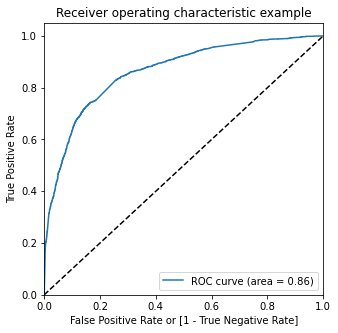

In [125]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.308798,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.277278,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.441986,3516,0,1,1,1,1,1,0,0,0,0,0
3,0,0.704987,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.308798,3934,0,1,1,1,1,0,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.517161  0.982968  0.230135
0.2   0.2  0.698361  0.898621  0.574963
0.3   0.3  0.774583  0.830089  0.740380
0.4   0.4  0.803803  0.706813  0.863568
0.5   0.5  0.801948  0.650446  0.895302
0.6   0.6  0.789579  0.585969  0.915042
0.7   0.7  0.769017  0.487024  0.942779
0.8   0.8  0.742270  0.375912  0.968016
0.9   0.9  0.694805  0.212084  0.992254


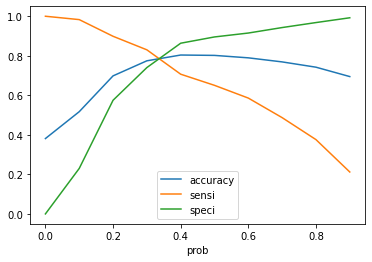

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, *0.3* is the optimum point to take it as a cutoff probability.

In [129]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.308798,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.277278,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.441986,3516,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.704987,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.308798,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [130]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.308798,1871,1,31
1,0,0.277278,6795,0,28
2,0,0.441986,3516,1,44
3,0,0.704987,8105,1,70
4,0,0.308798,3934,1,31


In [131]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2047
0     419
Name: final_Predicted, dtype: int64

In [132]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

#### Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [133]:

# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.774582560296846

In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2963, 1039],
       [ 419, 2047]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8300892133008921

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.7403798100949526

### Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

- Accuracy : 77.45%
- Sensitivity :83.00%
- Specificity : 74.03%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [138]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2596201899050475


In [139]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6633182112767336


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8761088113542282


### Precision and Recall

In [141]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2963, 1039],
       [ 419, 2047]], dtype=int64)

In [142]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6633182112767336

In [143]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8300892133008921

In [144]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6633182112767336

In [145]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8300892133008921

#### Precision and Recall Trade-off

In [146]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

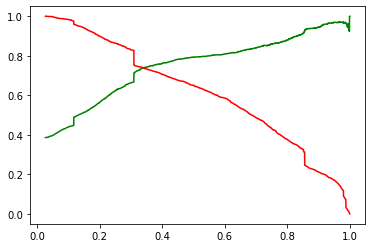

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [148]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.0,0.8,0.448735,1.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2376,0.0,0.0,0.000000,0.000000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7766,0.0,0.5,0.026187,0.833333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9199,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0.0,0.0,0.000000,0.000000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [149]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.0,0.8,0.448735,0,1,0,0,0,0,0
2376,0.0,0.0,0.000000,1,0,0,0,0,1,0
7766,0.0,0.5,0.026187,0,0,0,0,0,0,1
9199,0.0,0.0,0.000000,0,0,1,0,0,1,0
4359,0.0,0.0,0.000000,1,0,0,0,0,1,0


In [150]:
X_test_sm = sm.add_constant(X_test)

In [151]:
X_test_sm.shape

(2772, 11)

In [152]:
y_test_pred = res.predict(X_test_sm)    

In [153]:
y_test_pred[:10]

4269    0.303692
2376    0.855064
7766    0.749194
9199    0.308798
4359    0.855064
9186    0.431739
1631    0.612244
8963    0.234777
8007    0.095426
5324    0.198127
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
4269,0.303692
2376,0.855064
7766,0.749194
9199,0.308798
4359,0.855064


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.303692
1,1,2376,0.855064
2,1,7766,0.749194
3,0,9199,0.308798
4,1,4359,0.855064


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.303692
1,1,2376,0.855064
2,1,7766,0.749194
3,0,9199,0.308798
4,1,4359,0.855064


### Assigning Lead Score

In [160]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [161]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.303692,30
1,2376,1,0.855064,86
2,7766,1,0.749194,75
3,9199,0,0.308798,31
4,4359,1,0.855064,86


In [162]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.303692,30,1
1,2376,1,0.855064,86,1
2,7766,1,0.749194,75,1
3,9199,0,0.308798,31,1
4,4359,1,0.855064,86,1


In [163]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    924
0    171
Name: final_Predicted, dtype: int64

In [164]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

### Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7799422799422799

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1238,  439],
       [ 171,  924]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8438356164383561

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.7382230172927847

In [170]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.677916360968452

In [171]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8438356164383561

### Inference:
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 77.99%
- Sensitivity :84.38%
- Specificity : 73.82%

### Model Parameters 

In [172]:
res.params

const                                                  -3.155890
Do Not Email                                           -1.293899
TotalVisits                                             0.723826
Total Time Spent on Website                             4.516650
Lead Origin_Lead Add Form                               3.710834
Lead Source_Direct Traffic                             -0.279726
Lead Source_Olark Chat                                  1.130204
Lead Source_Welingak Website                            2.070420
What is your current occupation_Student                 1.091479
What is your current occupation_Unemployed              1.219943
What is your current occupation_Working Professional    3.770016
dtype: float64